/tmp/ipykernel_3717548/1335526829.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})


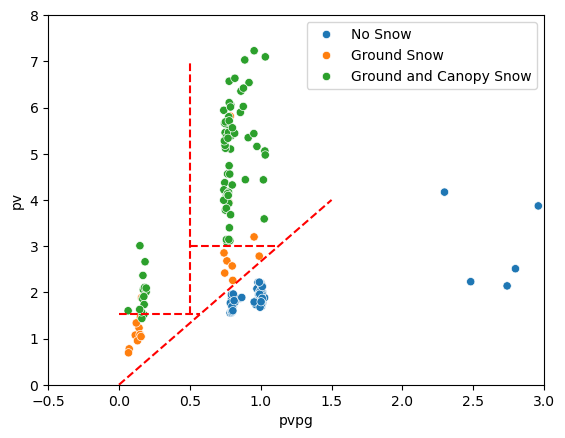

159


,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions
1145,sodankyla_full,19/03/2023,67.384356,26.575640,0.064285,1.601111,24.906508,19.210526,1.063886,1.0,1.0,0.000000,29.0,0.000000,3.886820,3.886820,2.0,Ground and Canopy Snow
493,marcell_MN,20/03/2022,47.473368,-93.434096,0.067098,0.691049,10.299083,18.837838,240.184526,1.0,0.0,0.000000,16.0,0.000000,2.160098,2.160098,1.0,Ground Snow
1127,sodankyla_full,16/03/2024,67.393365,26.552235,0.071928,0.776268,10.792315,18.657143,4.332858,1.0,0.0,0.000000,35.0,0.000000,1.816470,1.816470,1.0,Ground Snow
1129,sodankyla_full,16/03/2024,67.393365,26.692668,0.114643,1.073163,9.360929,20.450000,3.408555,1.0,0.0,0.000000,35.0,0.000000,3.035240,3.035240,1.0,Ground Snow
950,sodankyla_full,03/04/2024,67.330301,26.552235,0.121826,1.337015,10.974770,18.500000,138.719549,1.0,0.0,0.000000,36.0,0.000000,2.472293,2.472293,1.0,Ground Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,oregon_yp,16/06/2021,44.310286,-121.561925,2.296695,4.169092,1.815257,18.750000,0.685302,0.0,0.0,0.000000,14.0,0.000000,2.294225,2.294225,0.0,No Snow
1299,torgnon,23/08/2022,45.819295,7.554436,2.481689,2.230456,0.898765,21.975610,0.186102,0.0,0.0,0.000000,21.0,0.000000,1.579313,1.579313,0.0,No Snow
486,marcell_MN,19/09/2021,47.482377,-93.434096,2.738659,2.139082,0.781069,25.711111,0.933714,0.0,0.0,0.000000,14.0,0.000000,1.526635,1.526635,0.0,No Snow
1285,torgnon,21/05/2020,45.828305,7.515652,2.797484,2.510851,0.897539,25.782609,0.086268,0.0,0.0,0.000000,8.0,1.347826,1.630907,1.630907,0.0,No Snow


In [5]:
from scripts.imports import *

df = pd.read_pickle('dataset_landcover_forest_22_th3_1km.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    # 'pv_ratio': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean'
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    # &(df_grouped['pvpg']>.5)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.8)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.5)&(df_grouped['pv']>2)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<.5)&((df_grouped['FSC'] < .5)|(df_grouped['TreeSnow'] > 0))

    &(df_grouped['pv_ratio_mean'] >= 1.5)

    # &(df_grouped['data_quantity'] >= 18)]
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] >= 18)]
    # &(df_grouped['layer_flag'] <= .8)&(df_grouped['data_quantity'] > 10)]

data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.ceil(x))

data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})

sns.scatterplot(data = data.sort_values('JointSnow'), x='pvpg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlim(-.5,3)
plt.ylim(0,8)
plt.plot([0,1.5],[0,4],'r--')
plt.plot([0.5,1.1],[3,3],'r--')
plt.plot([0,0.57],[1.53,1.53],'r--')
plt.plot([0.5,0.5],[1.53,7],'r--')
plt.legend(loc='best')
plt.show()
print(len(data))
data.sort_values('pvpg')

/tmp/ipykernel_3717548/1877079589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'classification'] = data.apply(


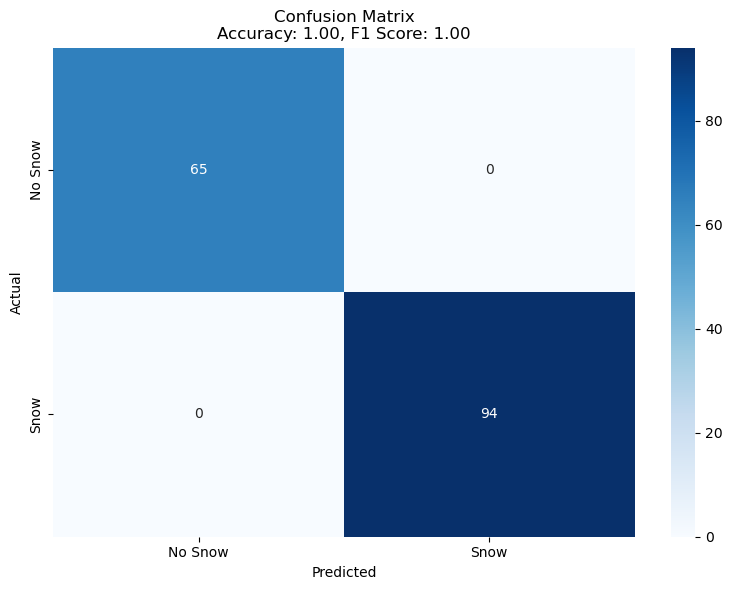

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (1 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (1 if row['pv'] > 3 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
    axis=1
)

data.loc[:, 'FSC'] = data['FSC'].apply(lambda x: round(x))#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(data['FSC'], data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['FSC'], data['classification'])
f1 = f1_score(data['FSC'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[(((data['classification']==0)&(data['FSC']>.95))|((data['classification']==1)&(data['FSC']<.05)))].sort_values('data_quantity')

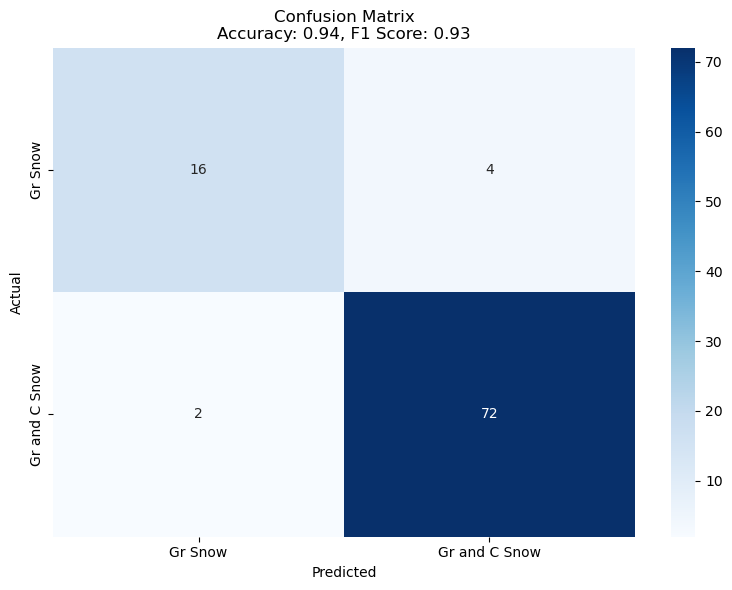

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification
340,lacclair,03/12/2019,46.956605,-71.689397,0.174872,1.516535,8.672251,20.538462,199.162620,1.0,0.3,0.000000,4.0,0.000000,2.134549,2.134549,2.0,Ground and Canopy Snow,1
952,sodankyla_full,03/04/2024,67.330301,26.692668,0.776605,3.941534,5.075340,23.000000,116.193775,1.0,0.0,0.000000,36.0,0.000000,2.790428,2.790428,1.0,Ground Snow,2
306,lacclair,03/04/2024,46.929577,-71.676199,0.953006,3.199535,3.357309,24.375000,162.170941,1.0,0.0,0.437500,22.0,0.000000,2.287990,2.287990,1.0,Ground Snow,2
216,delta_junction,27/01/2023,63.876595,-145.679776,0.161411,1.433681,8.882166,24.755102,0.660742,1.0,1.0,0.000000,23.0,1.000000,2.090355,2.090355,2.0,Ground and Canopy Snow,1
314,lacclair,03/04/2024,46.974623,-71.676199,0.159009,1.883117,11.842819,27.581818,181.601900,1.0,0.0,1.000000,22.0,0.000000,1.729781,1.729781,1.0,Ground Snow,2
61,delta_junction,05/01/2020,63.912632,-145.802560,0.785258,5.812205,7.401653,28.529412,116.616700,1.0,0.0,0.323529,6.0,0.647059,3.447709,3.447709,1.0,Ground Snow,2


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 1 if (row['pvpg'] <= 0.5)&(row['pv'] <= 1.53) else (2 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 3 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0)))),
    axis=1
)

data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.ceil(x))#.astype(int)

# Compute confusion matrix
labels = ['Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(data[data['JointSnow']!=0]['JointSnow'], data[data['JointSnow']!=0]['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data[data['JointSnow']!=0]['JointSnow'], data[data['JointSnow']!=0]['classification'])
f1 = f1_score(data[data['JointSnow']!=0]['JointSnow'], data[data['JointSnow']!=0]['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==1)&(data['JointSnow']==2))|
    ((data['classification']==2)&(data['JointSnow']==1))].sort_values('data_quantity')

/tmp/ipykernel_468797/2695550508.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})


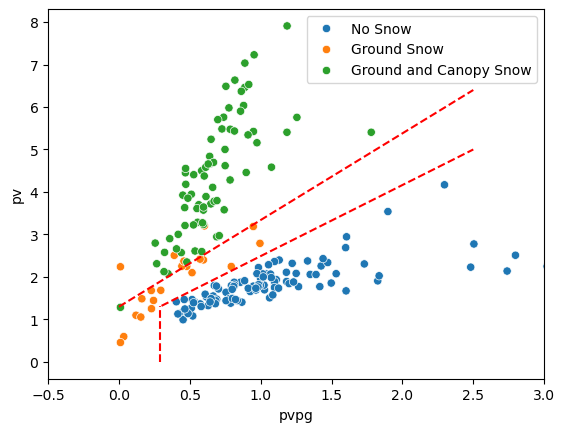

201


,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions
767,torgnon,14/02/2023,45.810286,7.541508,0.010000,2.239824,223.982353,25.761905,0.158256,1.0,0.0,0.00,22.0,0.000000,1.331304,1.331304,1.0,Ground Snow
716,sodankyla_full,19/03/2023,67.384356,26.575640,0.010000,1.284602,128.460182,19.210526,1.063886,1.0,1.0,0.00,29.0,0.000000,3.952379,3.952379,2.0,Ground and Canopy Snow
283,marcell_MN,20/03/2022,47.473368,-93.434096,0.010000,0.456932,45.693013,18.837838,240.184526,1.0,0.0,0.00,16.0,0.000000,1.830670,1.830670,1.0,Ground Snow
704,sodankyla_full,16/03/2024,67.393365,26.552235,0.033449,0.596839,17.843109,18.657143,4.332858,1.0,0.0,0.00,35.0,0.000000,1.594764,1.594764,1.0,Ground Snow
706,sodankyla_full,16/03/2024,67.393365,26.692668,0.119818,1.098676,9.169559,20.450000,3.408555,1.0,0.0,0.00,35.0,0.000000,3.044062,3.044062,1.0,Ground Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,lacclair,13/07/2019,46.920568,-71.689397,4.554463,2.267037,0.497762,30.285714,0.313856,0.0,0.0,0.25,1.0,0.000000,1.339686,1.339686,0.0,No Snow
242,lacclair,13/07/2019,46.956605,-71.689397,4.676571,2.192539,0.468835,19.882353,0.326939,0.0,0.0,0.00,1.0,0.000000,1.467556,1.467556,0.0,No Snow
244,lacclair,13/07/2019,46.965614,-71.689397,5.394028,2.177343,0.403658,29.750000,0.313601,0.0,0.0,0.00,1.0,0.000000,1.326006,1.326006,0.0,No Snow
249,lacclair,13/07/2019,46.983632,-71.689397,14.581276,3.051767,0.209294,24.909091,0.334865,0.0,0.0,0.00,1.0,0.477273,1.215771,1.215771,0.0,No Snow


In [18]:
from scripts.imports import *

df = pd.read_pickle('dataset_landcover_forest_22_th3_1km_noprior.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    # 'pv_ratio': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean'
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    # &(df_grouped['pvpg']>.5)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.8)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.5)&(df_grouped['pv']>2)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<.5)&((df_grouped['FSC'] < .5)|(df_grouped['TreeSnow'] > 0))

    &(df_grouped['pv_ratio_mean'] >= 1.2)

    # &(df_grouped['data_quantity'] >= 18)]
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] >= 18)]
    # &(df_grouped['layer_flag'] <= .8)&(df_grouped['data_quantity'] > 10)]

data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.ceil(x))

data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})

sns.scatterplot(data = data.sort_values('JointSnow'), x='pvpg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlim(-.5,3)
# plt.ylim(0,8)
plt.plot([0.3,2.5],[1.32,5],'r--')
plt.plot([0,2.5],[1.3,6.4],'r--')
plt.plot([0.29,0.29],[0,1.32],'r--')
# plt.plot([0.5,0.5],[1.53,7],'r--')
plt.legend(loc='best')
plt.show()
print(len(data))
data.sort_values('pvpg')

/tmp/ipykernel_468797/3043025698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'classification'] = data.apply(


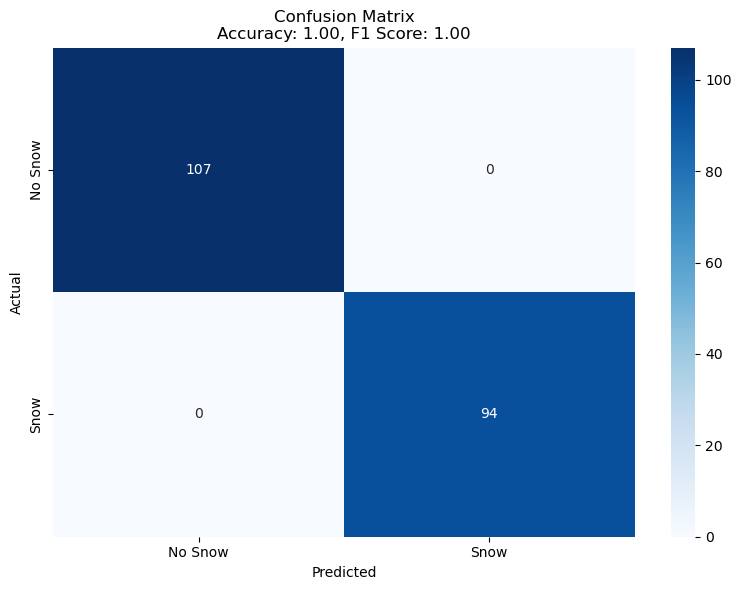

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 0 if (row['pvpg'] >= 0.29)&(row['pv'] <= 3.68/2.2*(row['pvpg']-.3)+1.32) else (1 if row['pv'] >= 5.1/2.5*row['pvpg']+1.3 else 1),
    axis=1
)

data.loc[:, 'FSC'] = data['FSC'].apply(lambda x: np.ceil(x))#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(data['FSC'],data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['FSC'], data['classification'])
f1 = f1_score(data['FSC'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[(((data['classification']==0)&(data['FSC']>.95))|((data['classification']==1)&(data['FSC']<.05)))].sort_values('data_quantity')

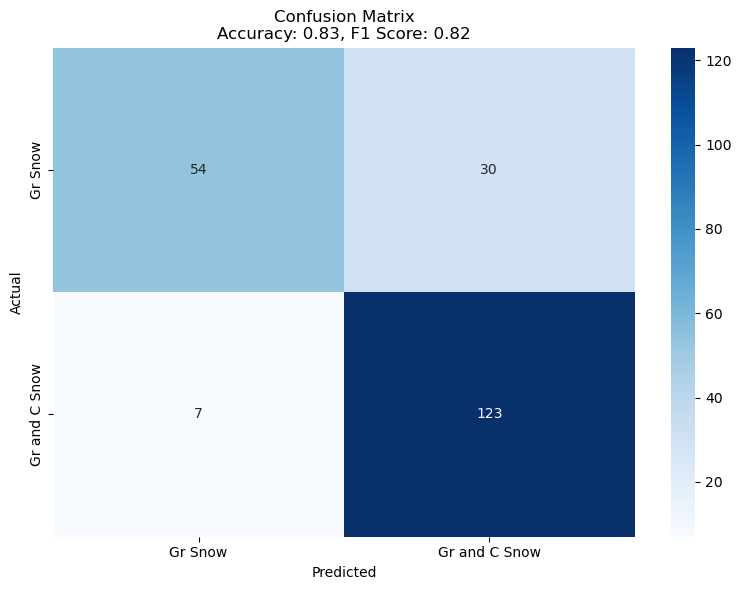

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification
653,sodankyla_full,11/04/2020,67.357328,26.669262,1.250000,6.297619,5.038095,3.000000,360.712799,1.0,0.0,0.0,10.0,0.000000,NaN,NaN,1.0,Ground Snow,2
794,torgnon,22/02/2022,45.801277,7.528580,0.010000,1.823226,182.322635,3.000000,0.280443,1.0,0.0,1.0,18.0,0.000000,NaN,NaN,1.0,Ground Snow,2
798,torgnon,22/02/2022,45.828305,7.541508,0.010000,2.026984,202.698413,4.000000,1.186712,1.0,0.0,0.0,18.0,0.000000,NaN,NaN,1.0,Ground Snow,2
768,torgnon,14/02/2023,45.837314,7.580292,0.010000,2.278525,227.852529,4.000000,0.166248,1.0,0.0,0.0,22.0,0.000000,NaN,NaN,1.0,Ground Snow,2
161,delta_junction,29/10/2022,63.912632,-145.700240,0.098394,1.106977,11.250475,6.000000,119.897545,1.0,1.0,0.0,22.0,0.000000,1.868065,1.868065,2.0,Ground and Canopy Snow,1
587,sodankyla_full,03/04/2024,67.348319,26.552235,0.389612,2.232000,5.728776,6.000000,183.444824,1.0,0.0,0.0,36.0,0.000000,NaN,NaN,1.0,Ground Snow,2
584,sodankyla_full,03/04/2024,67.339310,26.552235,0.380609,2.363355,6.209400,6.846154,142.159955,1.0,0.0,0.0,36.0,0.000000,3.028807,3.028807,1.0,Ground Snow,2
52,delta_junction,05/11/2018,63.885605,-145.720704,0.036049,0.836489,23.204300,7.000000,2.022435,1.0,0.5,0.0,0.0,0.000000,NaN,NaN,2.0,Ground and Canopy Snow,1
594,sodankyla_full,03/04/2024,67.366338,26.552235,0.462972,3.653373,7.891138,7.142857,122.107304,1.0,0.0,0.0,36.0,0.000000,2.224370,2.224370,1.0,Ground Snow,2
288,marcell_MN,20/03/2022,47.518414,-93.434096,0.956718,4.498409,4.701918,9.111111,252.409648,1.0,0.0,0.0,16.0,0.000000,2.897333,2.897333,1.0,Ground Snow,2


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 0 if (row['pvpg'] >= 0.5)&(row['pv'] <= 3.68/2.2*(row['pvpg']-.3)+1.32) else (2 if row['pv'] >= 5.1/2.5*row['pvpg']+1.3 else 1),
    axis=1
)

# print(data[data['classification']!=0]['JointSnow'])

# Compute confusion matrix
labels = ['Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'])
f1 = f1_score(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==1)&(data['JointSnow']==2))|
    ((data['classification']==2)&(data['JointSnow']==1))].sort_values('data_quantity')